In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [2]:
data = pd.read_csv("/content/heart.csv")

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
X = data.iloc[:, 0:13]
y = data.target

<Axes: xlabel='target', ylabel='count'>

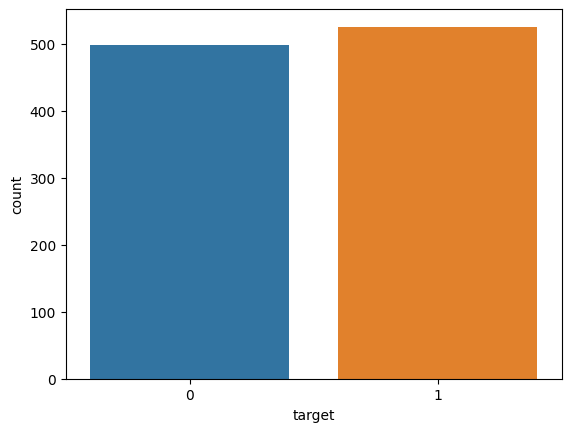

In [55]:
sns.countplot(data = data, x = data.target)

In [11]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 104.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1025 entries, 0 to 1024
Series name: target
Non-Null Count  Dtype
--------------  -----
1025 non-null   int64
dtypes: int64(1)
memory usage: 8.1 KB


(None, None)

In [14]:
columns = X.columns
columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 835 to 860
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       820 non-null    int64  
 1   sex       820 non-null    int64  
 2   cp        820 non-null    int64  
 3   trestbps  820 non-null    int64  
 4   chol      820 non-null    int64  
 5   fbs       820 non-null    int64  
 6   restecg   820 non-null    int64  
 7   thalach   820 non-null    int64  
 8   exang     820 non-null    int64  
 9   oldpeak   820 non-null    float64
 10  slope     820 non-null    int64  
 11  ca        820 non-null    int64  
 12  thal      820 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 89.7 KB


In [19]:
ct = make_column_transformer(
    (MinMaxScaler(), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)),
    remainder = 'passthrough'
    )

In [21]:
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))])

In [22]:
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
a = []
ta = []
for i in range(1, 101):
  model = RandomForestClassifier()
  model.fit(X_train_norm, y_train)
  a.append(int(model.score(X_train_norm, y_train)*100))
  ta.append(int(model.score(X_test_norm, y_test)*100))

In [30]:
a

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100]

In [31]:
ta

[98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 100,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98]

In [32]:
len(a)

100

In [33]:
g = np.arange(1, 101)

In [34]:
g

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

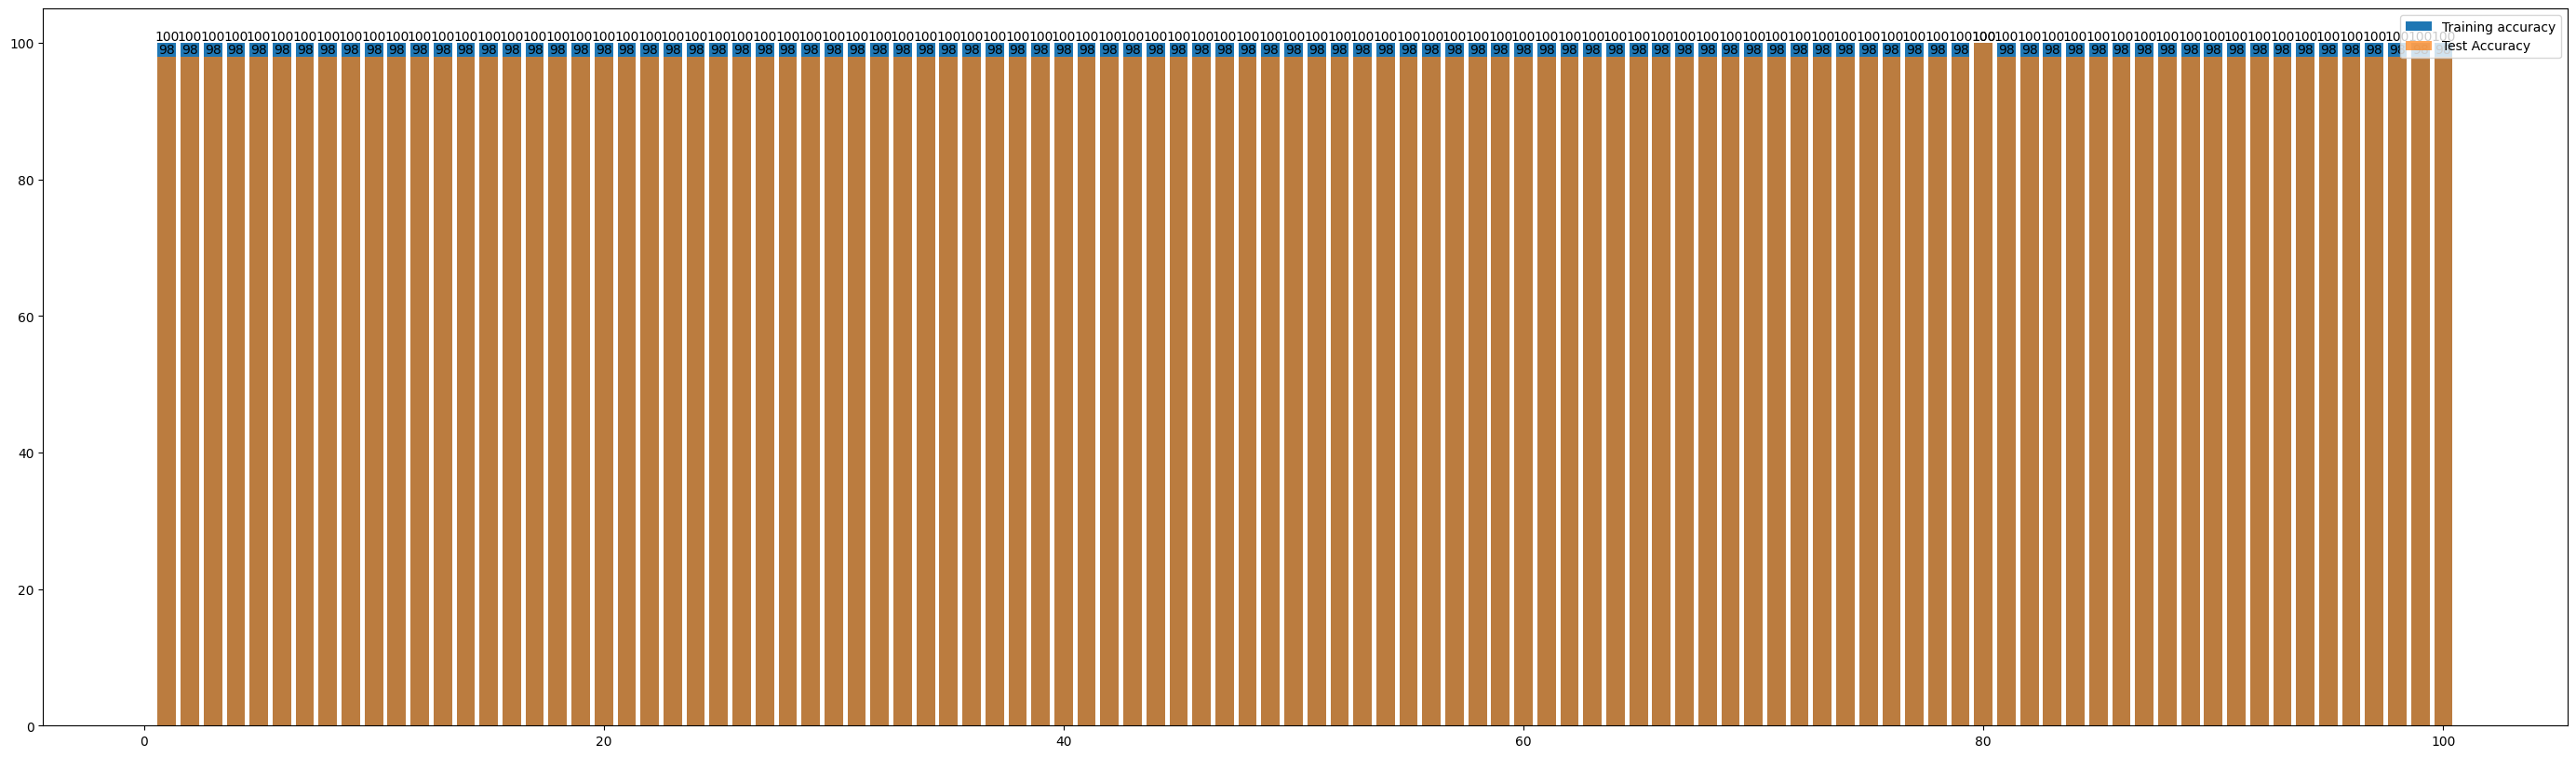

In [38]:
plt.figure(figsize = (35, 10))
h = plt.bar(g, a, label = 'Training accuracy')
l = plt.bar(g, ta, label = 'Test Accuracy', alpha = 0.7)
plt.bar_label(h)
plt.bar_label(l)
plt.legend()

In [82]:
rfc = RandomForestClassifier()
rfc.fit(X_train_norm, y_train)
rfc = rfc.score(X_test_norm, y_test)

In [40]:
import tensorflow as tf

In [83]:
tf.random.set_seed(42)

dnn = tf.keras.Sequential([
    # tf.keras.layers.Dense(32, activation = 'linear'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

dnn.compile(loss = tf.keras.losses.BinaryCrossentropy(),
            optimizer = tf.keras.optimizers.SGD(),
            metrics = ['accuracy'])

dayumm = dnn.fit(X_train_norm,
                y_train,
                epochs = 100,
                verbose = 1,
                validation_data = [X_test_norm, y_test])

Epoch 1/100
26/26 [==============================] - 1s 11ms/step - loss: 0.8254 - accuracy: 0.3902 - val_loss: 0.8001 - val_accuracy: 0.3220
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.7916 - accuracy: 0.3512 - val_loss: 0.7723 - val_accuracy: 0.2927
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.7685 - accuracy: 0.2988 - val_loss: 0.7530 - val_accuracy: 0.2878
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.7522 - accuracy: 0.2829 - val_loss: 0.7406 - val_accuracy: 0.3024
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.7406 - accuracy: 0.2963 - val_loss: 0.7310 - val_accuracy: 0.3317
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.7317 - accuracy: 0.3305 - val_loss: 0.7229 - val_accuracy: 0.3707
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.7241 - accuracy: 0.3768 - val_loss: 0.7158 - val_accuracy: 0.3951
Epoch 8/100


7/7 [==============================] - 0s 5ms/step - loss: 0.4053 - accuracy: 0.8341


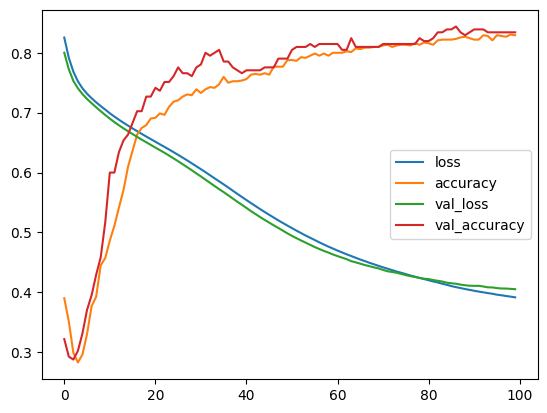

In [85]:
pd.DataFrame(dayumm.history).plot()
dnn = dnn.evaluate(X_test_norm, y_test)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
a = []
ta = []
for i in range(1, 101):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train_norm, y_train)
  a.append(int(model.score(X_train_norm, y_train)*100))
  ta.append(int(model.score(X_test_norm, y_test)*100))

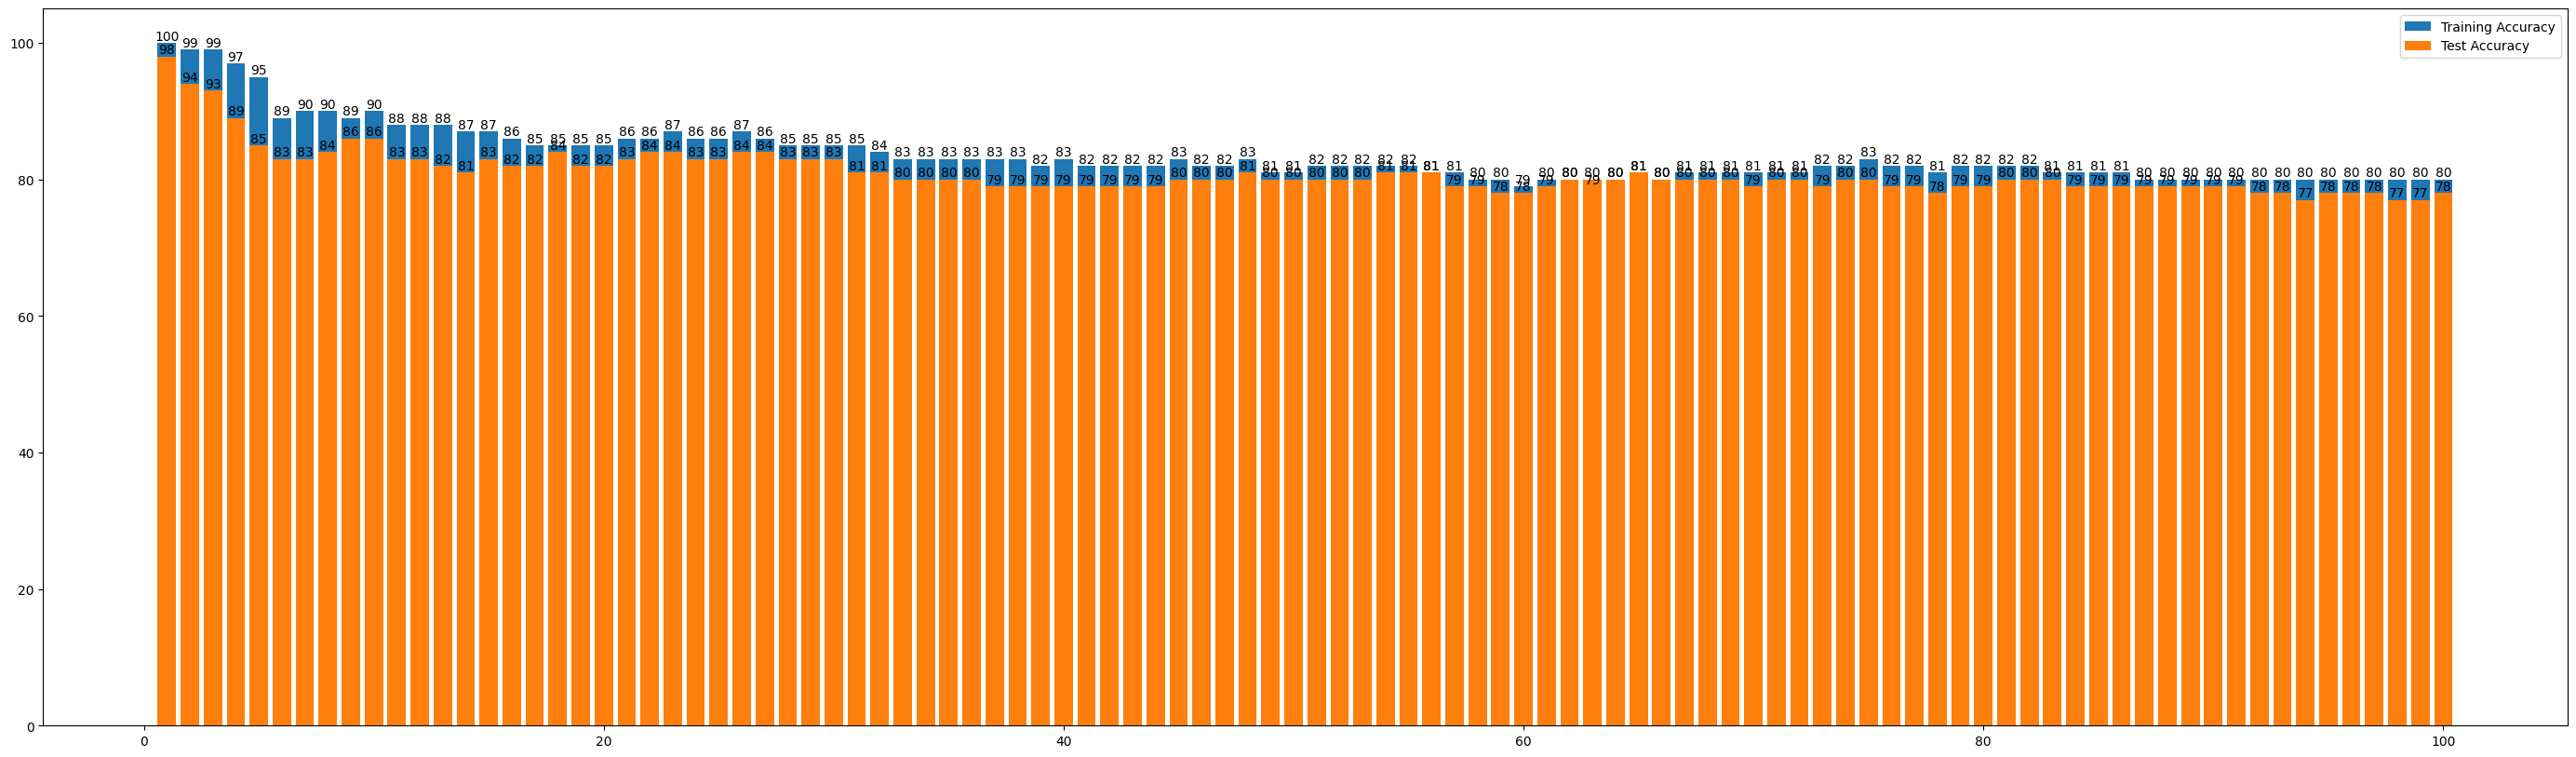

In [78]:
h = np.arange(1, 101)
plt.figure(figsize = (35, 10))
giga = plt.bar(h, a, label = "Training Accuracy")
chad = plt.bar(h, ta, label = "Test Accuracy")
plt.bar_label(giga)
plt.bar_label(chad)
plt.legend()

In [86]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_norm, y_train)
knn = knn.score(X_test_norm, y_test)

In [87]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train_norm, y_train)
sgd = sgd.score(X_test_norm, y_test)

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr = lr.score(X_test_norm, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [91]:
acc = [lr, sgd, rfc, knn, dnn[1]]

In [92]:
acc

[0.6634146341463415,
 0.775609756097561,
 0.9853658536585366,
 0.9853658536585366,
 0.8341463208198547]

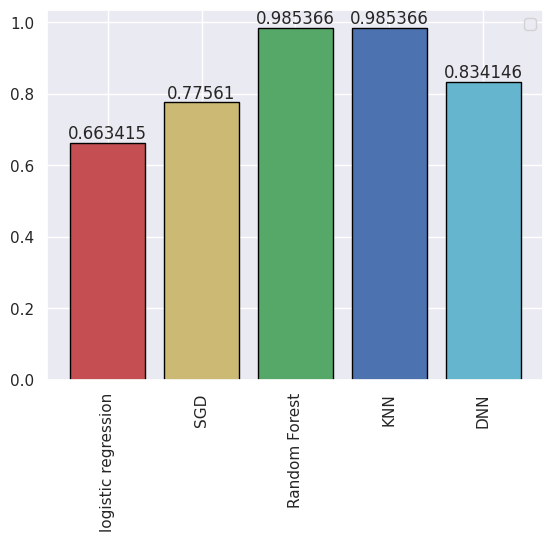

In [108]:
sns.set_theme()
dinggy = plt.bar(np.arange(1, 6), acc, color = ['r', 'y', 'g', 'b', 'c'], edgecolor = ['black'])
plt.xticks(np.arange(1, 6), ['logistic regression', 'SGD', 'Random Forest', 'KNN', 'DNN'], rotation = 90)
plt.bar_label(dinggy)
plt.legend()